In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from collections import namedtuple
import netCDF4 as ncdf

from Plot_tools import *
from File_tools import *

import pickle

_nthreads = 2



In [2]:

ds = xr.open_mfdataset('/scratch/wicker/cm1r20.3/run/squall_R_C3500/cm1out_0000*.nc', parallel=True)
run2_w = ds.winterp.values


ds = xr.open_mfdataset('/scratch/wicker/cm1r20.3/run/squall_c3500_kess/cm1out_0000*.nc', parallel=True)
run1_w = ds.winterp.values

print(run1_w.shape)
print(run2_w.shape)

scale = 15.

(25, 60, 256, 256)
(25, 60, 256, 256)


Text(0.5, 1.0, 'Y - TIME = 165 min    (    12.5,    -5.87)')

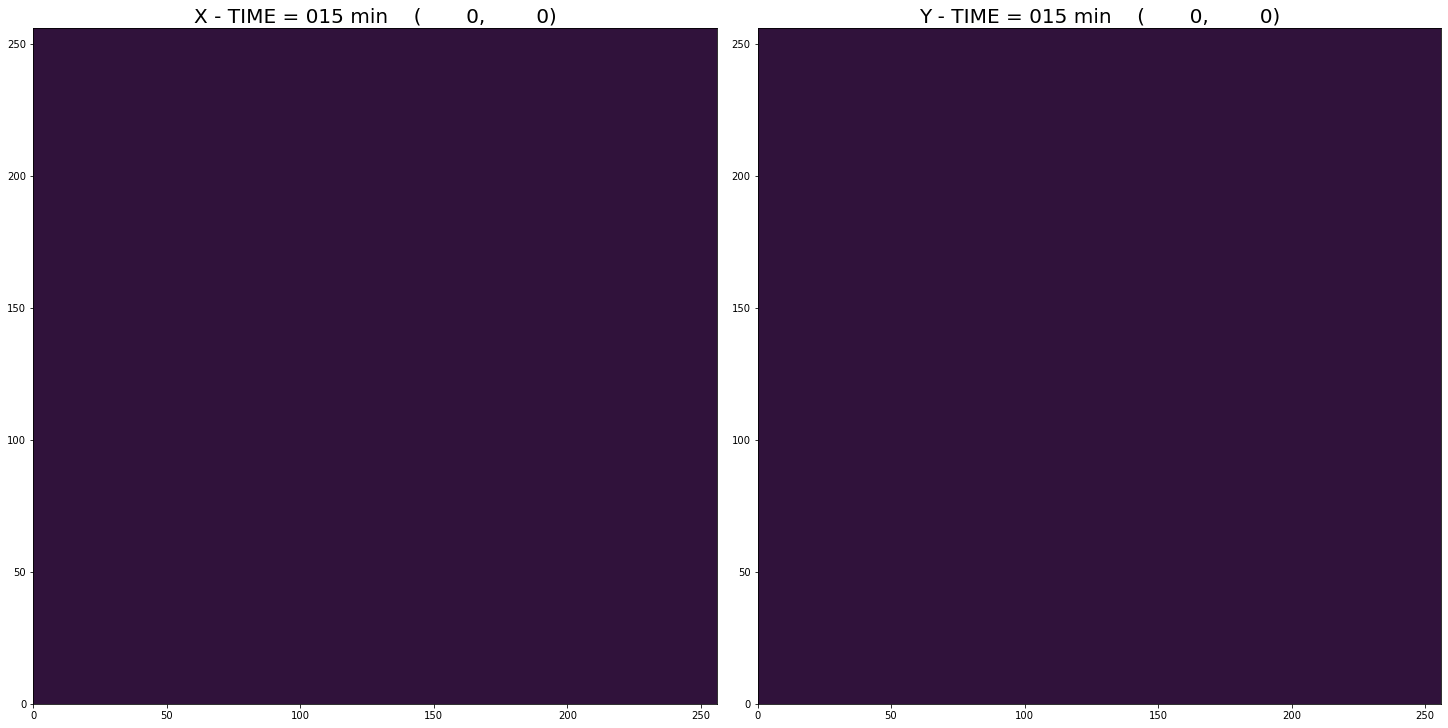

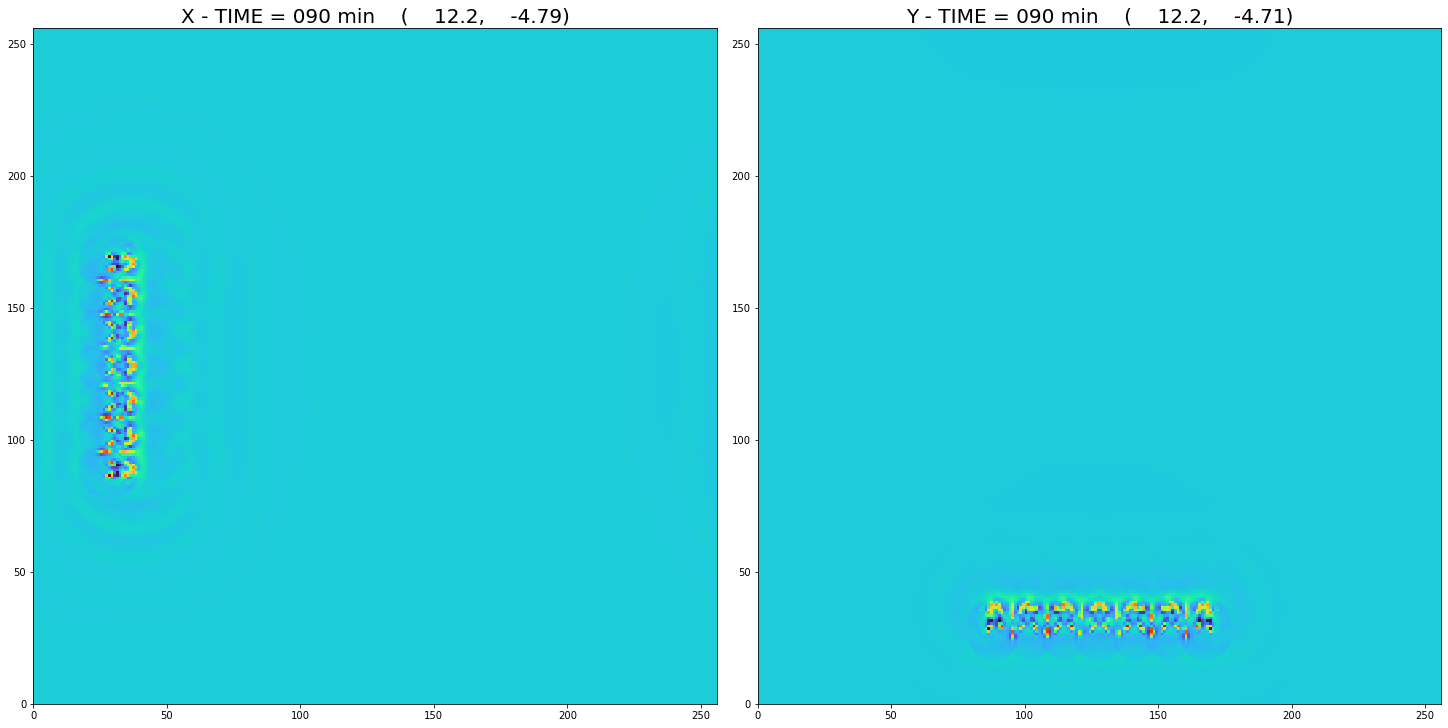

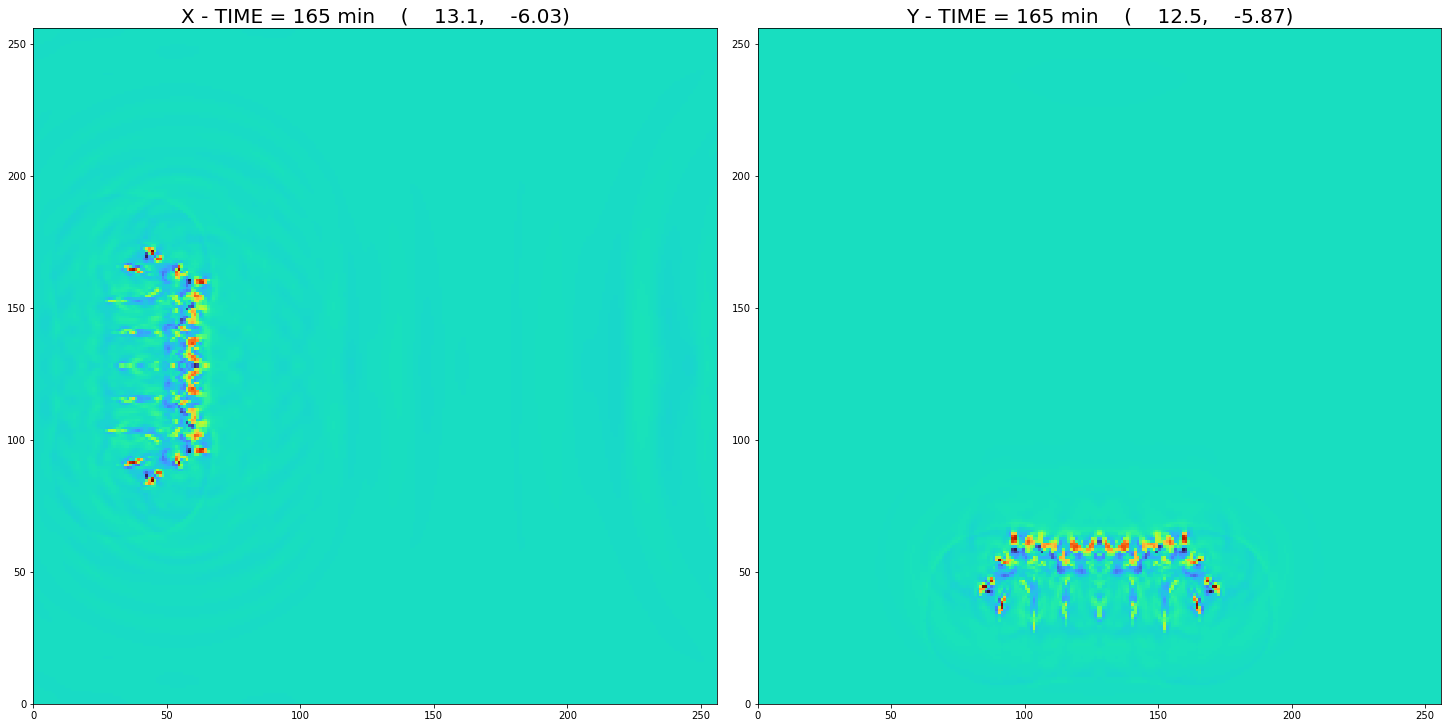

In [3]:
klevel = 20


fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))
time   = 0

ax[0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[0].set_title('X - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[1].pcolormesh(run2_w[time, klevel], cmap='turbo')
ax[1].set_title('Y - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run2_w[time, klevel].max(), run2_w[time, klevel].min()),fontsize=20)

fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))
time = 5

ax[0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[0].set_title('X - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[1].pcolormesh(run2_w[time, klevel], cmap='turbo')
ax[1].set_title('Y - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run2_w[time, klevel].max(), run2_w[time, klevel].min()),fontsize=20)

fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))
time = 10

ax[0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[0].set_title('X - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[1].pcolormesh(run2_w[time, klevel], cmap='turbo')
ax[1].set_title('Y - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run2_w[time, klevel].max(), run2_w[time, klevel].min()),fontsize=20)



Text(0.5, 1.0, 'Y (ROT) - TIME = 315 min    (    13.5,    -5.88)')

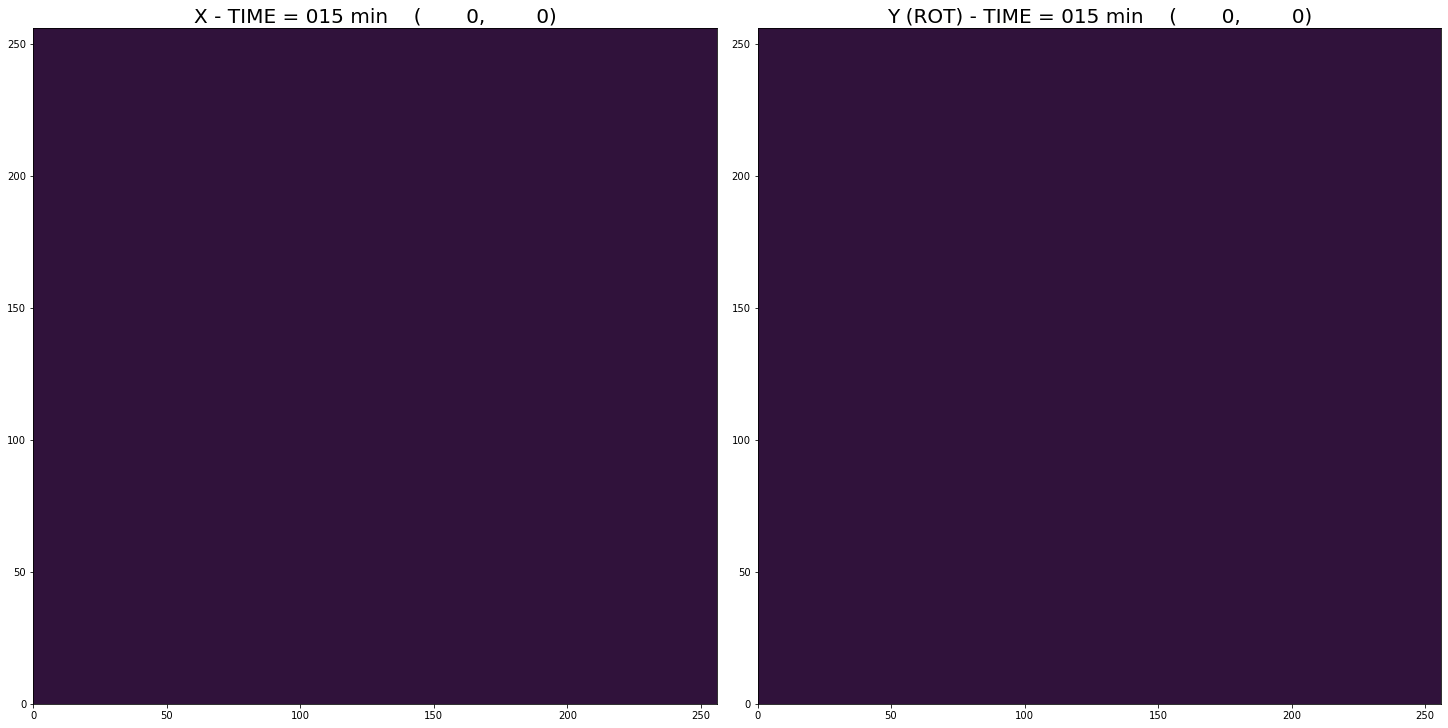

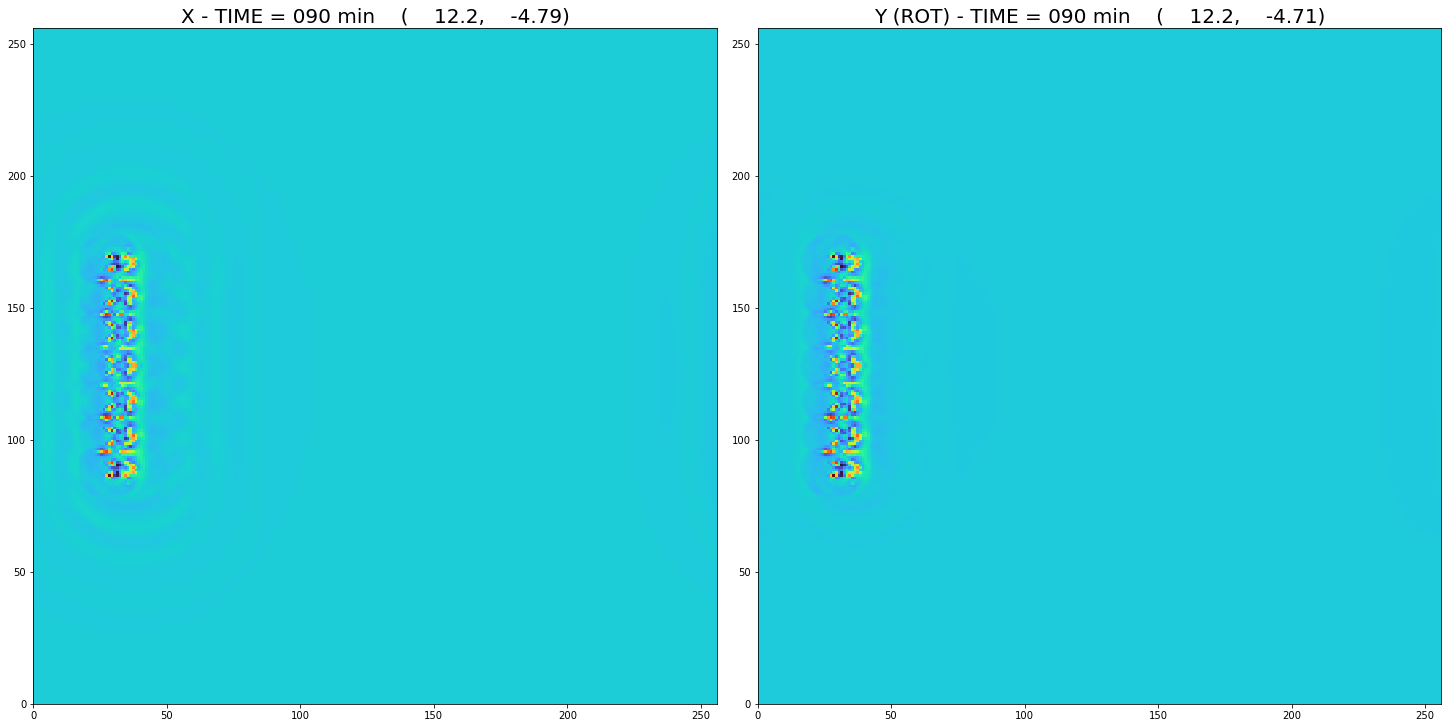

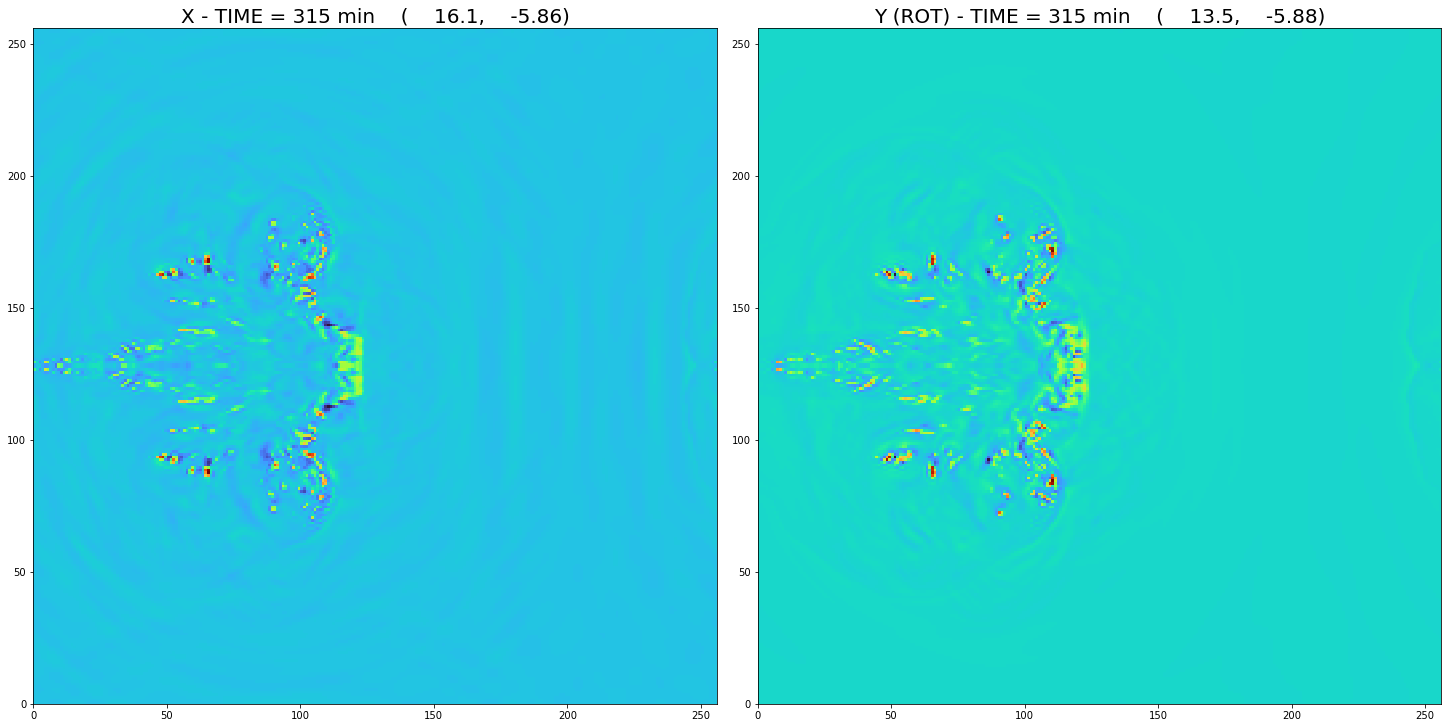

In [4]:
klevel = 20
fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))
time   = 0

ax[0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[0].set_title('X - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[1].pcolormesh(run2_w[time, klevel].transpose(), cmap='turbo')
ax[1].set_title('Y (ROT) - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run2_w[time, klevel].max(), run2_w[time, klevel].min()),fontsize=20)

fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))
time = 5

ax[0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[0].set_title('X - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[1].pcolormesh(run2_w[time, klevel].transpose(), cmap='turbo')
ax[1].set_title('Y (ROT) - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run2_w[time, klevel].max(), run2_w[time, klevel].min()),fontsize=20)

fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))
time = 20

ax[0].pcolormesh(run1_w[time, klevel], cmap='turbo')
ax[0].set_title('X - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run1_w[time, klevel].max(), run1_w[time, klevel].min()),fontsize=20)
ax[1].pcolormesh(run2_w[time, klevel].transpose(), cmap='turbo')
ax[1].set_title('Y (ROT) - TIME = %3.3i min    (%8.3g, %8.3g)' % ((time+1)*scale, run2_w[time, klevel].max(), run2_w[time, klevel].min()),fontsize=20)




In [5]:
diff = np.zeros((25,256,256))

for n in np.arange(25):
    
    w1 = run1_w[n,klevel]
    w2 = run2_w[n,klevel]
    
    diff[n] = w1 - w2.transpose()
        

Text(0.5, 1.0, 'W_DIFF - T = 225 min (    15.1,    -13.6)')

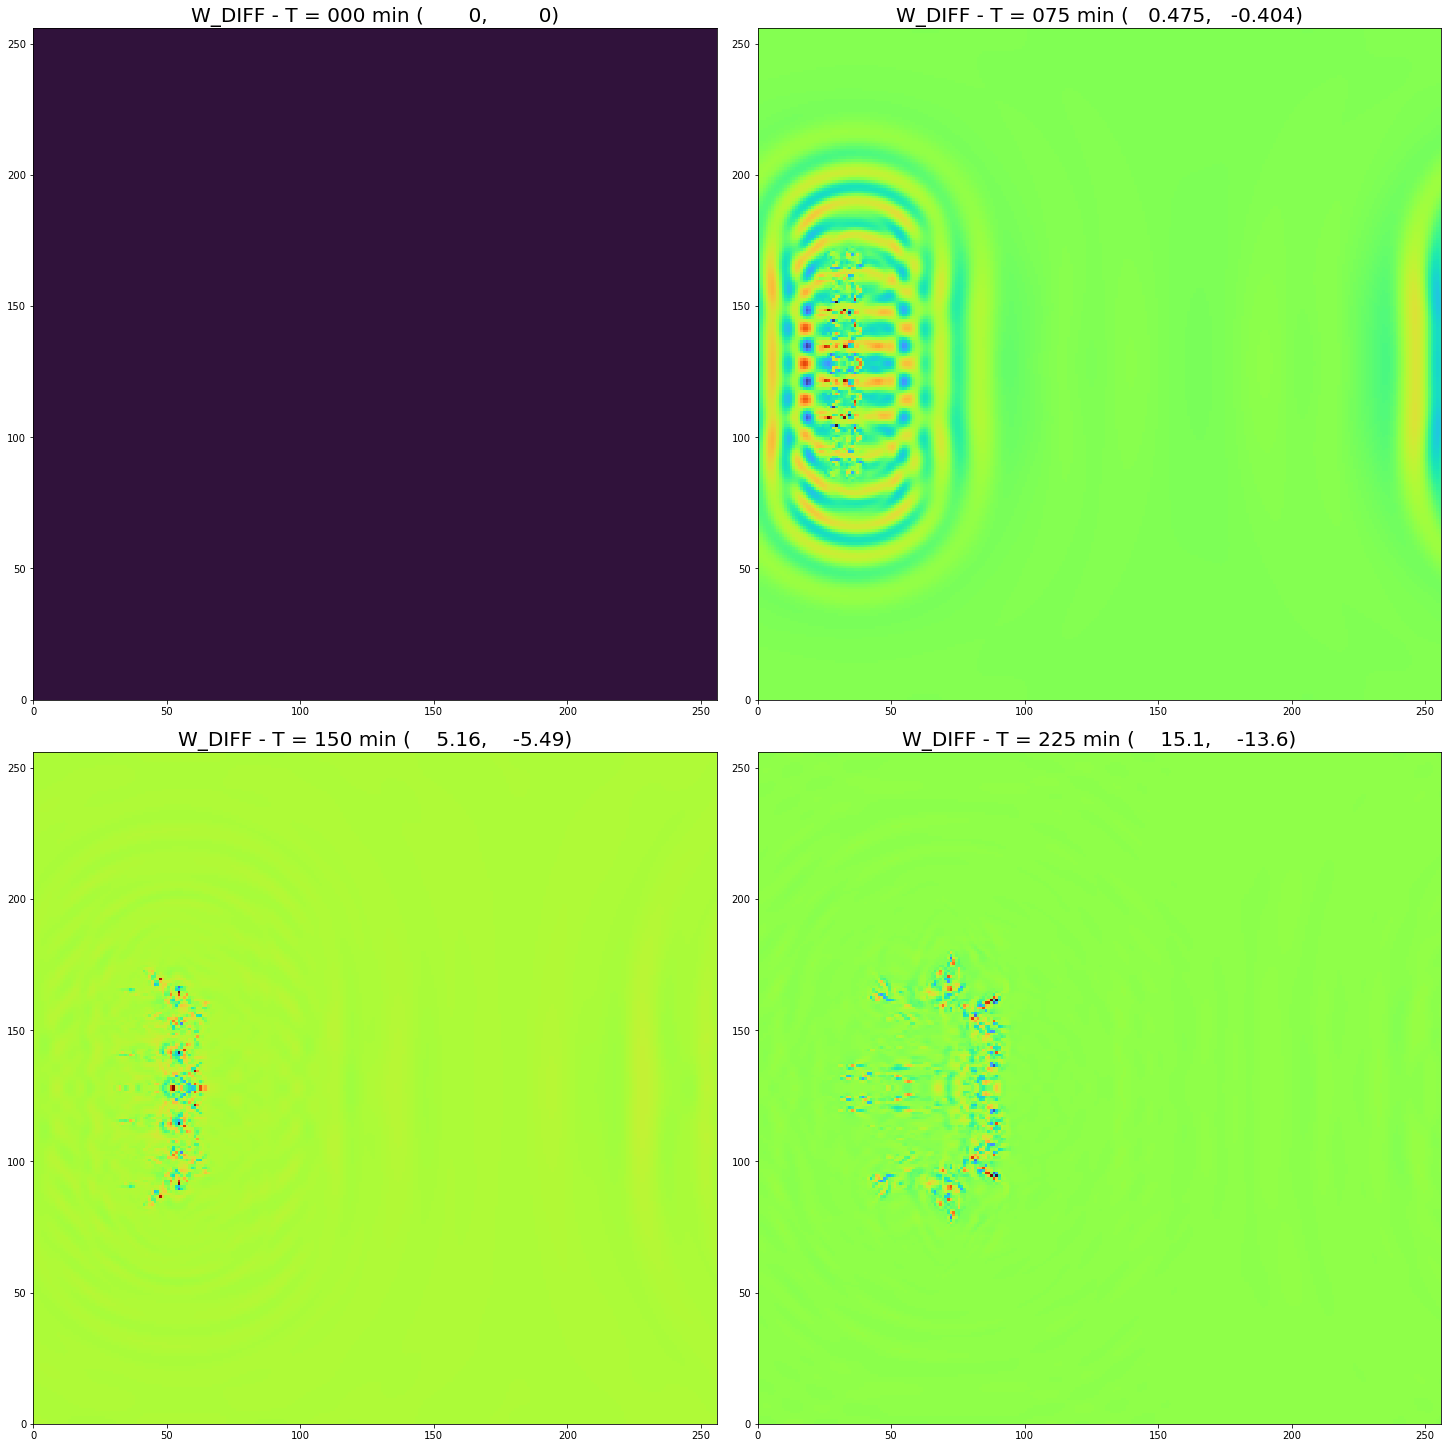

In [6]:
fig, ax = plt.subplots(2,2, constrained_layout=True,figsize=(20,20))

time = 0

ax[0][0].pcolormesh(diff[time], cmap='turbo')
ax[0][0].set_title('W_DIFF - T = %3.3d min (%8.3g, %8.3g)' % ((time)*scale, diff[time].max(), diff[time].min()),fontsize=20)

time = 5
ax[0][1].pcolormesh(diff[time], cmap='turbo')
ax[0][1].set_title('W_DIFF - T = %3.3d min (%8.3g, %8.3g)' % ((time)*scale, diff[time].max(), diff[time].min()),fontsize=20)

time = 10
ax[1][0].pcolormesh(diff[time], cmap='turbo')
ax[1][0].set_title('W_DIFF - T = %3.3d min (%8.3g, %8.3g)' % ((time)*scale, diff[time].max(), diff[time].min()),fontsize=20)

time = 15
ax[1][1].pcolormesh(diff[time], cmap='turbo')
ax[1][1].set_title('W_DIFF - T = %3.3d min (%8.3g, %8.3g)' % ((time)*scale, diff[time].max(), diff[time].min()),fontsize=20)


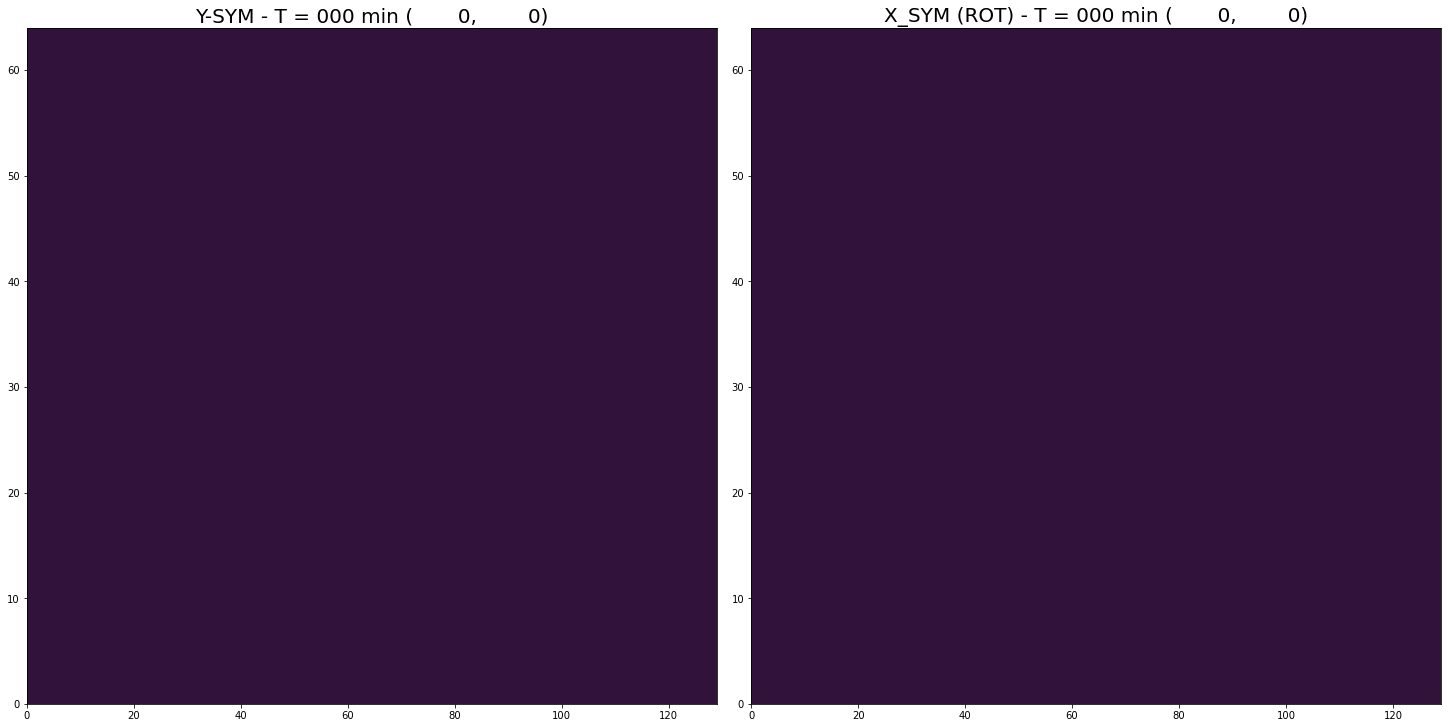

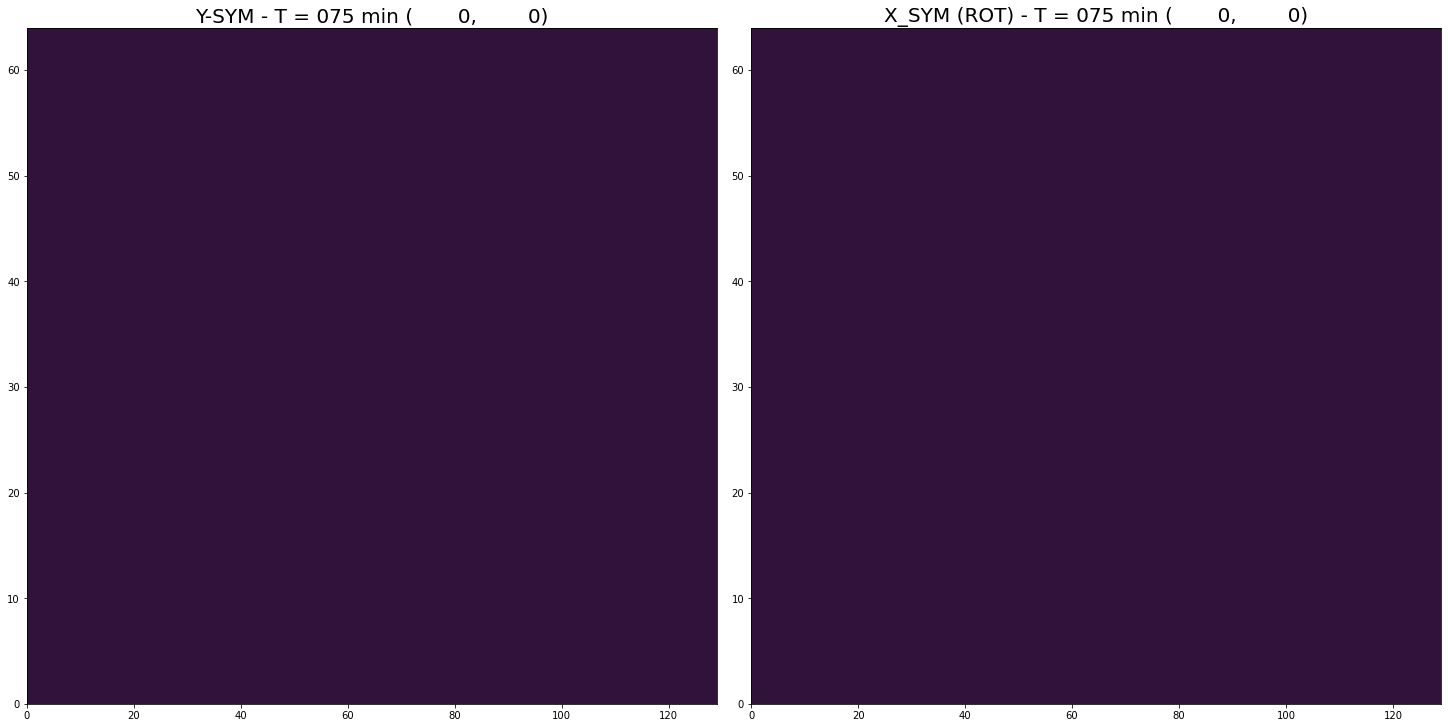

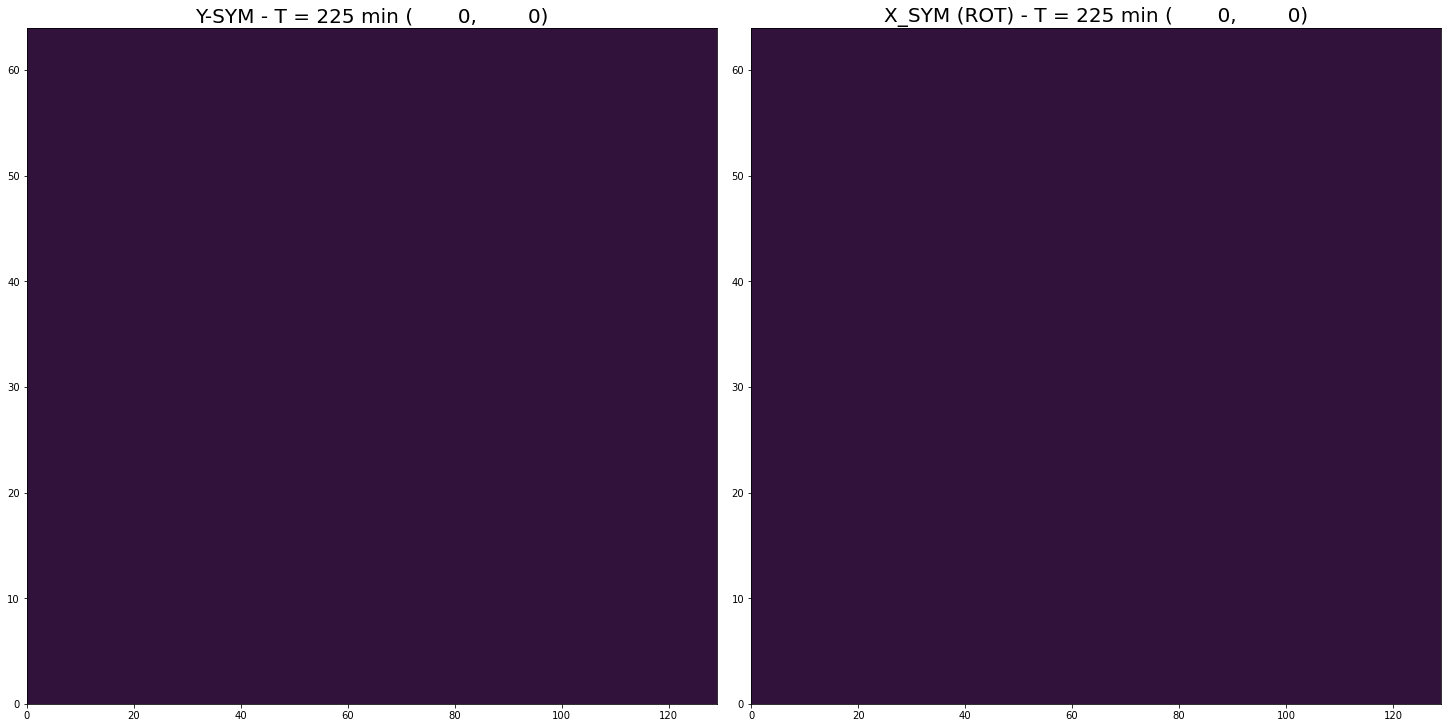

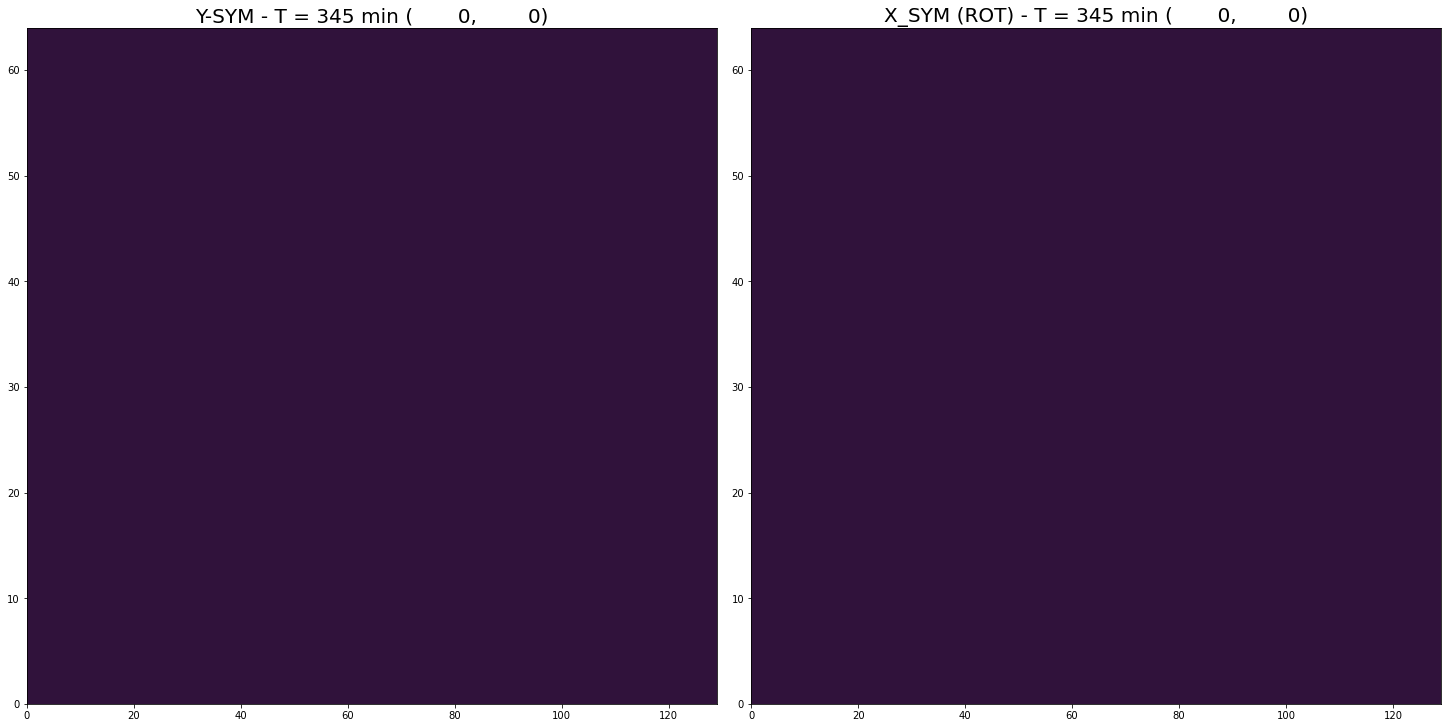

In [7]:
klevel = 10

diff0 = np.zeros((25,60,64,256))
diff1 = np.zeros((25,60,256,64))

for n in np.arange(25):
    
    w2 = run2_w[n]
    w1 = run1_w[n]

    for i in np.arange(64):
    
        diff0[n,:,i,:] = w1[:,127-i,:] - w1[:,128+i,:]
        diff1[n,:,:,i] = w2[:,:,127-i] - w2[:,:,128+i]
        
for time in [0,5,15,23]:
    fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))
    
    ax[0].pcolormesh(diff0[time,klevel,:,64:193], cmap='turbo')
    ax[0].set_title('Y-SYM - T = %3.3d min (%8.2g, %8.2g)' % (time*15, diff0[time].max(), diff0[time].min()),fontsize=20)
    ax[1].pcolormesh(diff1[time,klevel,64:193,:].transpose(), cmap='turbo')
    ax[1].set_title('X_SYM (ROT) - T = %3.3d min (%8.2g, %8.2g)' % (time*15, diff1[time].max(), diff1[time].min()),fontsize=20)


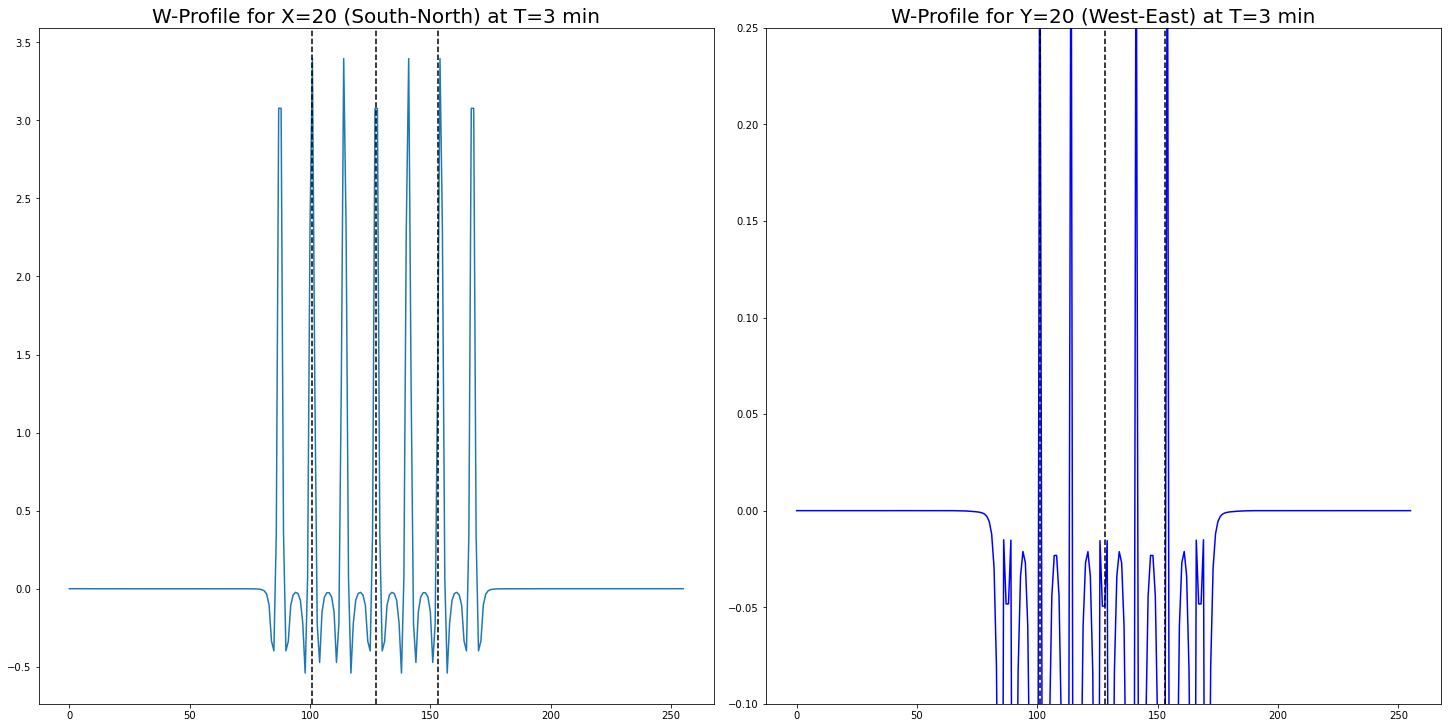

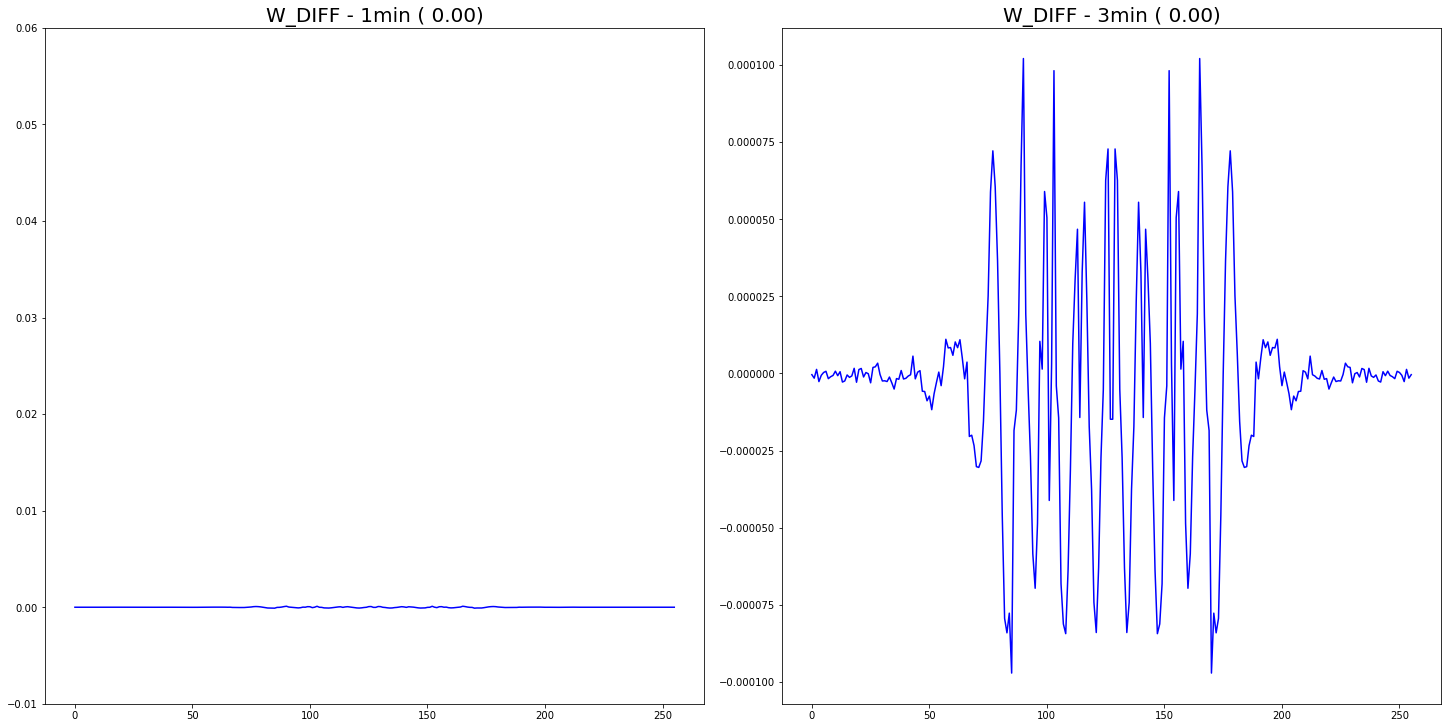

In [26]:
fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))

ax[0].plot(run1_w[1,klevel,:,21])
ax[0].set_title('W-Profile for X=20 (South-North) at T=3 min',fontsize=20)
ax[0].axvline(x=127.5, color='k', linestyle='--')
ax[0].axvline(x=101, color='k', linestyle='--')
ax[0].axvline(x=153, color='k', linestyle='--')

#ax[0].set_ylim(-0.1,0.25)

ax[1].plot(run2_w[1,klevel,20], color='b')
ax[1].set_title('W-Profile for Y=20 (West-East) at T=3 min',fontsize=20)
ax[1].axvline(x=128, color='k', linestyle='--')
ax[1].axvline(x=101, color='k', linestyle='--')
ax[1].axvline(x=153, color='k', linestyle='--')

ax[1].set_ylim(-0.1,0.25)

fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))

ax[0].plot(run1_w[1,klevel,:,20]-run2_w[1,klevel,20], color='b')
ax[0].set_title('W_DIFF - 1min (%5.2f)' % ((run1_w[0,klevel,:,20]-run2_w[0,klevel,20]).max()),fontsize=20)
ax[0].set_ylim(-0.01,0.06)

ax[1].plot(run1_w[1,klevel,:,20]-run2_w[1,klevel,20], color='b')
ax[1].set_title('W_DIFF - 3min (%5.2f)' % ((run1_w[2,klevel,:,20]-run2_w[2,klevel,20]).max()),fontsize=20)
ax[0].set_ylim(-0.01,0.06)


plt.show()

Text(0, 0.5, 'W-max (m/s)')

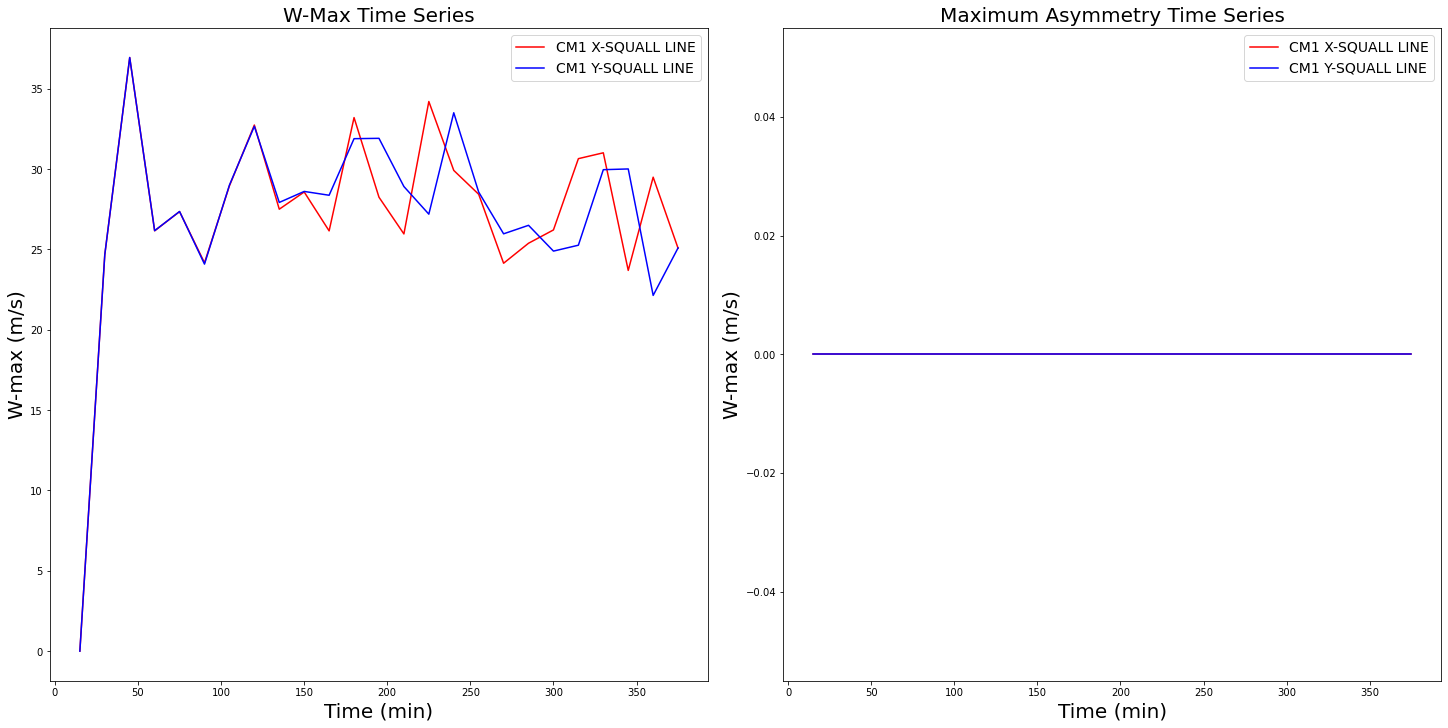

In [8]:
fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))

time_axis = (1 + np.arange(25)) * scale

ax[0].plot(time_axis, run1_w.max(axis=(1,2,3)), 'r', label = 'CM1 X-SQUALL LINE')
ax[0].plot(time_axis, run2_w.max(axis=(1,2,3)), 'b', label = 'CM1 Y-SQUALL LINE')

ax[0].set_title('W-Max Time Series',fontsize=20)

ax[0].legend(fontsize=14)

ax[0].set_xlabel('Time (min)',fontsize=20)
ax[0].set_ylabel('W-max (m/s)',fontsize=20)

ax[1].plot(time_axis, diff0.max(axis=(1,2,3)), 'r', label = 'CM1 X-SQUALL LINE')
ax[1].plot(time_axis, diff1.max(axis=(1,2,3)), 'b', label = 'CM1 Y-SQUALL LINE')

ax[1].set_title('Maximum Asymmetry Time Series',fontsize=20)

ax[1].legend(fontsize=14)

ax[1].set_xlabel('Time (min)',fontsize=20)
ax[1].set_ylabel('W-max (m/s)',fontsize=20)

# ax[0].axvline(x=127, color='k', linestyle='--')
# ax[0].axvline(x=101, color='k', linestyle='--')
# ax[0].axvline(x=153, color='k', linestyle='--')

#ax[0].set_ylim(-0.1,0.25)

# ax[1].plot(run2_w[9,klevel,20], color='b')
# ax[1].set_title('W-Profile for Y=20 (West-East) at T=3 min',fontsize=20)
# ax[1].axvline(x=127, color='k', linestyle='--')
# ax[1].axvline(x=101, color='k', linestyle='--')
# ax[1].axvline(x=153, color='k', linestyle='--')

